#Clustering | Assignment

1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
- K-Means and Hierarchical Clustering are both unsupervised learning methods used for clustering, but they work in very different ways.

---
 **1. K-Means Clustering**

**How it works**

* You choose the number of clusters **K** in advance.
* The algorithm assigns points to the nearest cluster center (centroid).
* Centroids are updated repeatedly until clusters stabilize.

 **Key Features**

* Fast and efficient for large datasets
* Works best when clusters are **spherical and well-separated**
* Requires **K** beforehand

 **Use Case**

✅ **Customer Segmentation in E-commerce**

Example:
An online store wants to group customers based on purchase behavior (spending, frequency, product categories).
K-Means is useful because the company already knows it wants, say, **5 customer segments**.

---
 **2. Hierarchical Clustering**

 **How it works**

* Does **not** require choosing the number of clusters upfront.
* Builds a hierarchy of clusters using either:

  * **Agglomerative** (bottom-up: merge clusters)
  * **Divisive** (top-down: split clusters)
* Results are shown in a **dendrogram** (tree-like structure).

 **Key Features**

* Good for smaller datasets
* Helps visualize cluster relationships
* More computationally expensive than K-Means

 **Use Case**

✅ **Gene Expression Analysis in Biology**

Example:
Researchers want to find relationships between genes based on expression patterns.
Hierarchical clustering is useful because they don’t know how many groups exist and want to explore the natural structure.

---

 **Main Differences Summary**

| Feature                             | K-Means                        | Hierarchical Clustering          |
| ----------------------------------- | ------------------------------ | -------------------------------- |
| Need to choose clusters beforehand? | Yes (K)                        | No                               |
| Output                              | Flat clusters                  | Tree-like hierarchy (dendrogram) |
| Speed                               | Fast, scalable                 | Slower for large data            |
| Best for                            | Large datasets                 | Small/medium datasets            |
| Cluster shape                       | Works well with round clusters | Works with varied shapes         |




2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
- The **Silhouette Score** is a metric used to evaluate how well a clustering algorithm has grouped the data.

Its main purpose is to measure:

✅ **How similar a data point is to its own cluster**
vs
✅ **How different it is from other clusters**

In simple words:
**It tells you whether your clusters are well-separated and meaningful.**

---

 **How Silhouette Score Works**

For each data point, it calculates two values:
 **1. a = Intra-cluster distance**

* Average distance between the point and all other points in the **same cluster**
* Measures how tightly grouped the cluster is

 **2. b = Nearest-cluster distance**

* Average distance between the point and points in the **nearest neighboring cluster**
* Measures how far the point is from other clusters

---

**Silhouette Formula**

[
S = \frac{b-a}{\max(a,b)}
]

---

 **Score Range and Meaning**

The Silhouette Score lies between **-1 and +1**:

| Score Value         | Meaning                                         |
| ------------------- | ----------------------------------------------- |
| **+1 (close to 1)** | Perfect clustering, clusters are well-separated |
| **0**               | Clusters overlap, unclear separation            |
| **Negative (< 0)**  | Points may be assigned to the wrong cluster     |

---

**Purpose in Evaluating Clustering Algorithms**

 ✅ 1. Measures Cluster Quality

Helps check if clusters are compact and distinct.

 ✅ 2. Helps Choose the Best Number of Clusters (K)

In K-Means, you can try different values of K and pick the one with the highest silhouette score.

 ✅ 3. Works Without Ground Truth Labels

Since clustering is unsupervised, silhouette score is useful because it does not require actual labels.

 ✅ 4. Compares Different Clustering Algorithms

You can use it to compare K-Means vs Hierarchical vs DBSCAN.

---

 **Example Use**

Suppose you run K-Means with different K values:

| K | Silhouette Score |
| - | ---------------- |
| 2 | 0.45             |
| 3 | 0.62             |
| 4 | 0.50             |

Best choice: **K = 3** because it gives the highest score.



3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?
- DBSCAN (**Density-Based Spatial Clustering of Applications with Noise**) is a clustering algorithm that forms clusters based on **data density**, not distance to centroids.

It is very useful for finding **arbitrarily shaped clusters** and detecting **outliers**.

---

 ✅ Core Parameters of DBSCAN

DBSCAN mainly depends on **two core parameters**:

---

**1. eps (ε) → Neighborhood Radius**

 **Meaning**

* Defines the maximum distance within which points are considered neighbors.

**Influence**

* Controls the **size of the neighborhood** around each point.

 **Effect**

* **Small eps** → very tight clusters, many points become noise
* **Large eps** → clusters may merge, less noise

 Example:

If eps = 0.5, only points within distance 0.5 are neighbors.

---

 **2. min_samples → Minimum Points Required**

**Meaning**

* Minimum number of points needed inside an eps-neighborhood to form a **dense region**.

 **Influence**

* Determines how strict DBSCAN is in defining clusters.

 **Effect**

* **Low min_samples** → more clusters, less noise
* **High min_samples** → fewer clusters, more noise/outliers

---

 ✅ How These Parameters Define Point Types

DBSCAN classifies points into 3 categories:

---

 **1. Core Point**

A point is a **core point** if:

[
\text{neighbors within eps} \geq min_samples
]

These points form the heart of a cluster.

---

**2. Border Point**

* Lies within eps of a core point
* But does not have enough neighbors to be core itself

---

 **3. Noise Point (Outlier)**

* Not within eps range of any core point
* Marked as an outlier

---

# ✅ Parameter Influence Summary

| Parameter       | Controls            | If Too Small                       | If Too Large                   |
| --------------- | ------------------- | ---------------------------------- | ------------------------------ |
| **eps**         | Neighborhood radius | Many outliers, fragmented clusters | Clusters merge incorrectly     |
| **min_samples** | Density requirement | Too many small clusters            | Too much noise, fewer clusters |


# ✅ Example Use Case

 Clustering GPS Location Data

* eps decides how close locations must be to be considered the same region
* min_samples decides how many visits are needed before calling it a “popular place”

---

 ✅ Key Advantage of DBSCAN

* No need to specify number of clusters beforehand
* Detects outliers naturally
* Works well with irregular cluster shapes

---

If you want, I can show how to choose eps using the **k-distance graph**, which is the best practical method.


4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- Feature scaling is critical for clustering algorithms like **K-Means** and **DBSCAN** because these algorithms rely on **distance measures** to group points. If features are on different scales, the clustering results can be misleading.



**Why It Matters**

1. **Distance-Based Algorithms**

   * Both K-Means and DBSCAN use distance (usually Euclidean) to determine cluster membership.
   * Example: Suppose you have two features:

     * Age: 0–100
     * Income: 0–100,000
   * Without scaling, the large-scale feature (Income) will dominate the distance calculation, and Age will have almost no influence.

2. **Cluster Shape and Assignment**

   * K-Means updates centroids based on average distances.
   * DBSCAN checks **eps neighborhoods**.
   * If one feature is larger in magnitude, clusters will be biased toward that feature.

3. **Consistency Across Features**

   * Scaling ensures all features contribute equally.
   * Common scaling methods:

     * **Standardization**: Mean = 0, Std = 1
     * **Min-Max Scaling**: Values between 0 and 1

---

 **Example**

Without scaling:

* Height (cm): 150–200
* Weight (kg): 50–100

Distance between points is dominated by Height → clusters may ignore Weight.

With scaling (0–1):

* Both Height and Weight influence clustering equally → more meaningful clusters.

---
 **Key Takeaway**

Feature scaling ensures that **all features are treated fairly** in distance calculations, leading to **more accurate and interpretable clusters**.

---

If you want, I can explain **which scaling method is better for K-Means vs DBSCAN** and why.


5. What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- The **Elbow Method** is a simple technique to help decide the **optimal number of clusters (K)** in K-Means clustering.

It’s based on the idea that adding more clusters will always reduce the **within-cluster variation**, but after a certain point, the improvement becomes small.

---

 **How It Works**

1. **Compute K-Means for different values of K**

   * For example, K = 1, 2, 3 … 10

2. **Calculate the Sum of Squared Errors (SSE) or Within-Cluster Sum of Squares (WCSS)**

   * SSE measures the total distance of each point from its cluster centroid.

[
\text{SSE} = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2
]

Where:

* (C_i) = cluster i
* (\mu_i) = centroid of cluster i

3. **Plot SSE vs K**

   * X-axis: Number of clusters (K)
   * Y-axis: SSE/WCSS

4. **Look for the “Elbow”**

   * The point where SSE starts to decrease more slowly (the curve bends like an elbow)
   * This indicates that adding more clusters beyond this point doesn’t give much improvement.

---

 **Example**

| K | SSE  |
| - | ---- |
| 1 | 1000 |
| 2 | 600  |
| 3 | 350  |
| 4 | 300  |
| 5 | 280  |

* The elbow is around **K = 3** → optimal number of clusters

---
 **Why It Helps**

* Avoids choosing too few clusters (underfitting) or too many clusters (overfitting)
* Provides a **visual guideline** to select K based on diminishing returns

---
 **Limitation**

* The elbow is not always clear-cut → sometimes other methods like **Silhouette Score** are used alongside.

---

If you want, I can make a **quick diagram showing the elbow curve**, which makes it easier to visualize.


6. Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers

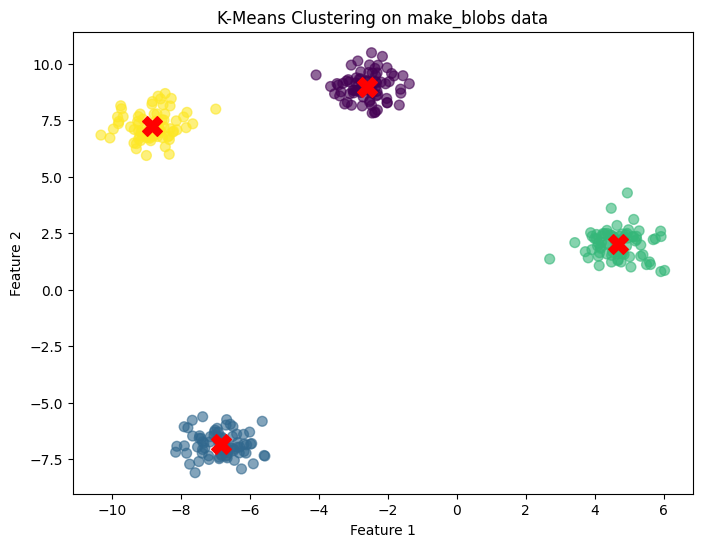

In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')  # cluster centers
plt.title("K-Means Clustering on make_blobs data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


7. : Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).


In [2]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # You can tune eps as needed
dbscan.fit(X_scaled)
labels = dbscan.labels_

# Step 4: Count clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found (excluding noise): 0
Number of noise points: 178


8.  Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

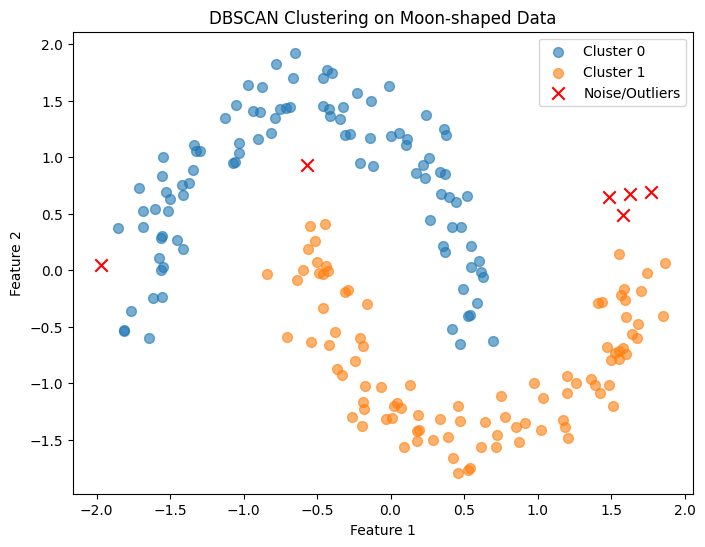

In [3]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Standardize features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_

# Step 4: Identify core points, clusters, and outliers
unique_labels = set(labels)
colors = ['blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

plt.figure(figsize=(8,6))

for label in unique_labels:
    cluster_points = X_scaled[labels == label]
    if label == -1:
        # Outliers
        plt.scatter(cluster_points[:,0], cluster_points[:,1], c='red', marker='x', s=80, label='Noise/Outliers')
    else:
        plt.scatter(cluster_points[:,0], cluster_points[:,1], s=50, alpha=0.6, label=f'Cluster {label}')

plt.title("DBSCAN Clustering on Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


9.  Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


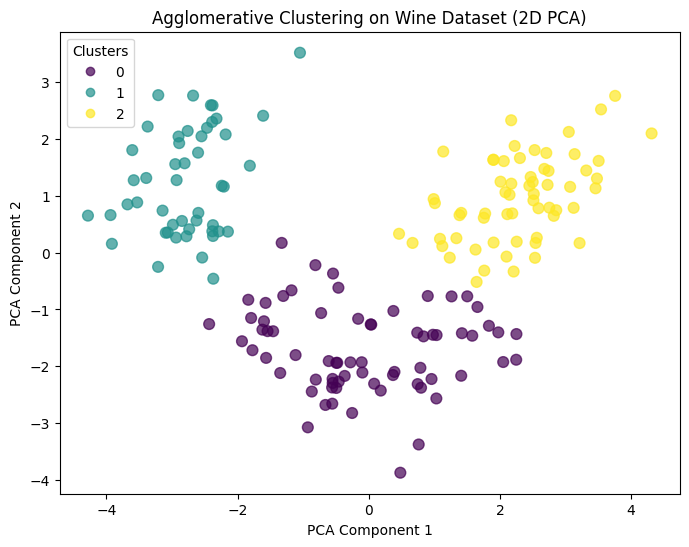

In [4]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target  # optional, for comparison

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agglo.fit_predict(X_pca)

# Step 5: Visualize clusters in 2D
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=60, alpha=0.7)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
-  Which clustering algorithm(s) would you use and why?
-  How would you preprocess the data (missing values, scaling)?
-  How would you determine the number of clusters?
-  How would the marketing team benefit from your clustering analysis?

Answer 1. Choosing the Clustering Algorithm

For customer segmentation, I would consider:

K-Means Clustering

Pros: Efficient on large datasets, easy to interpret

Works well if customer groups are roughly spherical in feature space (e.g., total spend, frequency, average basket size)

Can directly segment customers into a predefined number of clusters

DBSCAN

Pros: Detects outliers (e.g., unusual customers or rare purchasing patterns) and can capture irregular cluster shapes

Useful if some customers are very different from the main groups

Hierarchical Clustering (Agglomerative)

Pros: Helps visualize cluster hierarchy and relationships between customer segments

Useful if marketing wants a multi-level segmentation (e.g., broad categories → subcategories)

Workflow choice: Start with K-Means for clear segmentation and use DBSCAN to detect outliers if needed. Hierarchical clustering could supplement for insights into cluster relationships.

2. Data Preprocessing

Before clustering, the data must be prepared carefully:

Handle Missing Values

Fill missing demographic values (age, income) using median or mean

For missing purchase history, fill zeros if the customer didn’t buy in that category

Feature Encoding

Convert categorical features (gender, region, membership type) to numerical form using one-hot encoding

Feature Scaling

Standardize numeric features using StandardScaler or MinMaxScaler

Necessary because clustering relies on distance, and features like income and number of purchases may have very different scales

Optional Dimensionality Reduction

Use PCA to reduce high-dimensional purchase history into a few components

Helps with visualization and removes redundant information

3. Determining the Number of Clusters

Elbow Method

Plot within-cluster sum of squares (WCSS) vs K to find where adding more clusters stops giving big improvements

Silhouette Score

Measures how well-separated the clusters are

Helps confirm the best number of clusters

Domain Knowledge

Sometimes marketing may want a practical number of segments (e.g., 3–5 customer types)

4. Benefits to the Marketing Team

Once clustering is done, the marketing team can:

Target Promotions

Offer personalized discounts or product recommendations to specific clusters

Identify High-Value Customers

Focus loyalty programs on clusters with high spend or frequent purchases

Detect Outliers

Spot unusual customer behavior that might indicate fraud or a niche segment

Tailor Messaging

Create campaigns suited to cluster demographics (e.g., age, region, product preference)

Measure Campaign Success

Track how each segment responds to promotions

K=2, Silhouette Score=0.525
K=3, Silhouette Score=0.575
K=4, Silhouette Score=0.456
K=5, Silhouette Score=0.399

Optimal number of clusters: 3


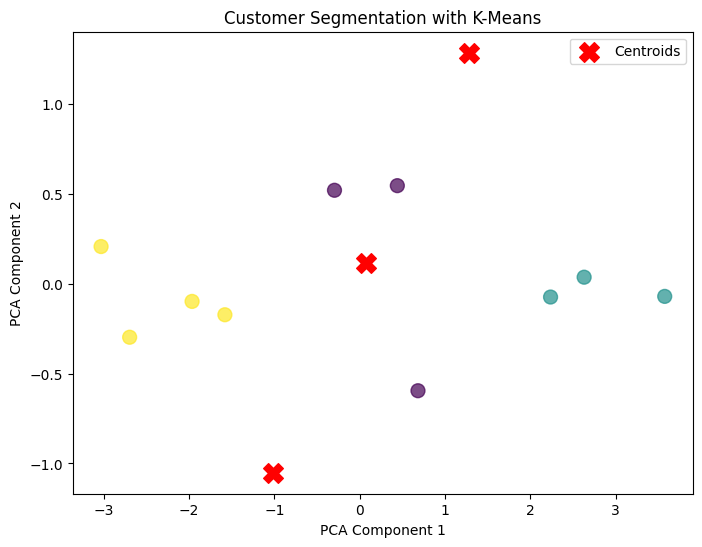


Customer segments:
   Age  Income  Electronics  Clothing  Groceries  Cluster
0   25   50000            5        10         50        2
1   45   80000           15         5         60        0
2   30   60000            7         8         55        2
3   35   70000           10         7         65        0
4   50   90000           20         3         70        1
5   23   52000            3        12         52        2
6   40   75000           12         6         68        0
7   60  100000           25         2         75        1
8   55   95000           22         4         72        1
9   28   58000            6         9         54        2


In [5]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Sample dataset (simulating customer demographics and purchases)
data = {
    'Age': [25, 45, 30, 35, 50, 23, 40, 60, 55, 28],
    'Income': [50000, 80000, 60000, 70000, 90000, 52000, 75000, 100000, 95000, 58000],
    'Electronics': [5, 15, 7, 10, 20, 3, 12, 25, 22, 6],
    'Clothing': [10, 5, 8, 7, 3, 12, 6, 2, 4, 9],
    'Groceries': [50, 60, 55, 65, 70, 52, 68, 75, 72, 54]
}
df = pd.DataFrame(data)

# Step 2: Preprocessing
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Determine optimal number of clusters using Silhouette Score
best_k = 0
best_score = -1
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nOptimal number of clusters: {best_k}")

# Step 4: Apply K-Means with optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

# Step 5: Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X', label='Centroids')
plt.title("Customer Segmentation with K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Step 6: Show cluster assignments
print("\nCustomer segments:")
print(df)
